<p style="text-align:center;">
    <font face="Georgia" size=5 color="red"><b>Import Required libraries</b></font>
</p>

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
import xgboost
from xgboost import XGBClassifier
import xgboost as xgb
import joblib
import numpy as np
from sklearn.preprocessing import MinMaxScaler

<p style="text-align:center;">
    <font face="Georgia" size=5 color="red"><b>Load Dataset</b></font>
</p>

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<p style="text-align:center;">
    <font face="Georgia" size=5 color="red"><b>Dataset Overview</b></font>
</p>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
class_counts = df['target'].value_counts()
print(f"Number of classes:\n{class_counts}")

Number of classes:
target
1    357
0    212
Name: count, dtype: int64


In [7]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

<p style="text-align:center;">
    <font face="Georgia" size=5 color="red"><b>Feature Selection SELECTBEST</b></font>
</p>

In [8]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X,y)
selected_features = X.columns[selector.get_support()]
print(selected_features.tolist())


['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


In [9]:
selected_features = [
    'mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points',
    'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points'
                    ]

<p style="text-align:center;">
    <font face="Georgia" size=5 color="red"><b> Min & Max</b></font>
</p>

In [10]:
for feature in selected_features:
    min_value = df[feature].min()
    max_value = df[feature].max()
    print(f"Feature: {feature}, Min: {min_value:.2f}, Max: {max_value:.2f}")

Feature: mean radius, Min: 6.98, Max: 28.11
Feature: mean perimeter, Min: 43.79, Max: 188.50
Feature: mean area, Min: 143.50, Max: 2501.00
Feature: mean concavity, Min: 0.00, Max: 0.43
Feature: mean concave points, Min: 0.00, Max: 0.20
Feature: worst radius, Min: 7.93, Max: 36.04
Feature: worst perimeter, Min: 50.41, Max: 251.20
Feature: worst area, Min: 185.20, Max: 4254.00
Feature: worst concavity, Min: 0.00, Max: 1.25
Feature: worst concave points, Min: 0.00, Max: 0.29


<p style="text-align:center;">
    <font face="Georgia" size=5 color="red"><b> Model making</b></font>
</p>

In [11]:

X = df[selected_features]
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:

model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

<p style="text-align:center;">
    <font face="Georgia" size=5 color="red"><b> Important point</b></font>
</p>

Model XGBoots is resistant to data not being scaled, and according to the test that was done, no difference in accuracy was created by using data scaling, and because of this, the data was not standardized.

In [ ]:
# scaler_X = MinMaxScaler()
# X_train_normalized = scaler_X.fit_transform(X_train)
# X_test_normalized = scaler_X.transform(X_test)

<p style="text-align:center;">
    <font face="Georgia" size=5 color="red"><b>Evaluation</b></font>
</p>

In [13]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

93.85964912280701


<p style="text-align:center;">
    <font face="Georgia" size=5 color="red"><b>Using GridSearch to increase accuracy</b></font>
</p>

In [ ]:
xgb = XGBClassifier( eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='accuracy', n_jobs=-1, cv=5, verbose=2)

grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)




Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
Best Parameters:  {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best Accuracy:  0.9582417582417582


<p style="text-align:center;">
    <font face="Georgia" size=5 color="red"><b>Rebuilding the model with the best parameters</b></font>
</p>

In [14]:
best_xgb_model = XGBClassifier(
    colsample_bytree=0.6,
    gamma=0,
    learning_rate=0.01,
    max_depth=4,
    min_child_weight=1,
    n_estimators=300,
    subsample=0.8,
    eval_metric='logloss',
    random_state=42
)
best_xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

<p style="text-align:center;">
    <font face="Georgia" size=5 color="red"><b>Evaluation</b></font>
</p>



In [15]:
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

Accuracy on test data: 94.74%


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

accuracy: 94.74%


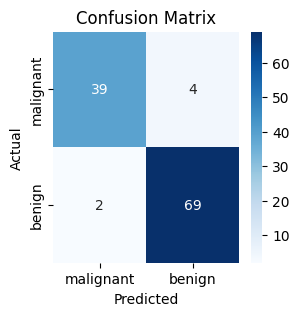

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:

from sklearn.metrics import classification_report
import pandas as pd

y_pred = model.predict(X_test)
report_dict = classification_report(y_test, y_pred, target_names=data.target_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose())



              precision    recall  f1-score    support
0              0.952381  0.930233  0.941176   43.00000
1              0.958333  0.971831  0.965035   71.00000
accuracy       0.956140  0.956140  0.956140    0.95614
macro avg      0.955357  0.951032  0.953106  114.00000
weighted avg   0.956088  0.956140  0.956036  114.00000


<p style="text-align:center;">
    <font face="Georgia" size=5 color="red"><b>Save  model</b></font>
</p>

In [ ]:
joblib.dump(best_xgb_model, "model.pkl")
print("Model saved successfully.")

Model saved successfully.
